### Erroen kokaeraren teknikan oinarritutako diseinua

Planta, berrelikadura ez unitarioarekin

$G(s) = \frac{1}{(s+1)}$

$H(s) = \frac{1}{(s+2)}$

Espezifikazioak:

- Gaindiketa %10 baino txikiago

- Puntako denbora 1s

Diseinua bera ez da aldatzen, bainabai emaitza, zero bat agertzen delako $(s+2)$.

In [59]:
s=%s;
g=1/(s+1)
h1=1/(s+2)

// GaindiketA %10
d=0.6;

T1=1;

   g  = 
    1    
   ----  
   1 +s  
  h1  = 
    1    
   ----  
   2 +s  
     

Polo nagusien aukeraketa lortzeko espezifikazioak eta Erroen Kokaeraren azterketa (kontrol proportzionala erabiliz)

              

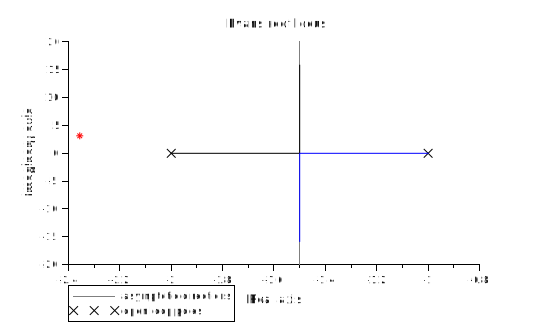

In [37]:
%plot inline
//T1=%pi/wd

wd=%pi/T1;

//wd=wn*sqrt(1-d^2)

wn=wd/sqrt(1-d^2);
s0=-d*wn+wn*sqrt(d^2-1);

//s0 in EK

scf(1);clf()
evans(g*h1,250)
plot(real(s0),imag(s0),'*r')

EKn ikusten da polo desiratua hurrun dagoela eta zero baten bitartez (PD bat) adarrak erakarri ahal dira, punto horietatik pasatzeko

$PD = K_p (1+ T_d s)$

- Erabiltzen da fase baldintza $T_d$ kalkulatzeko, ikusiz ze fasea gehitu behar den $s_0$ puntuan.

- Gero, modulu baldintza erabiltzen da $K_p$ kalkulatzeko.

   db  = 
  -8.8879586
 phi  = 
   161.49291
     Td  = 
   0.1544687
    db  = 
  -11.221488
 phi  = 
  -180.
       Kp  = 
   3.6397739
     gitxia  = 
   7.2795479 +4.7642364s +0.5622312s^2  
   -----------------------------------  
       5.6397739 +3.5622312s +s^2       
  
  "Polo desiratua"

  -1.7811156 + 1.5707963i
 
  "Begizta itxiko poloak"

  -1.7811156 + 1.5707963i
  -1.7811156 - 1.5707963i


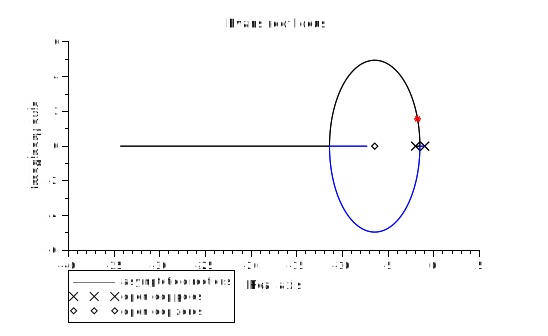

In [62]:
%plot inline

[db,phi]=dbphi(horner(g*h1,s0))

// Behar den fasea, fase baldintza lortzeko
pha=(180-phi)*%pi/180;
Td=1/(imag(s0)/tan(pha)-real(s0))

// Konprobazioa
[db,phi]=dbphi(horner((1+Td*s)*g*h1,s0))

evans((1+Td*s)*g*h1,250)
plot(real(s0),imag(s0),'*r')

// Moldulu baldintza lortzeko
Kp=1/abs(horner((1+Td*s)*g*h1,s0))

pd=(1+Td*s);

gitxia=((Kp*pd*g)/.(h1))

disp('Polo desiratua',s0)
disp('Begizta itxiko poloak',roots(gitxia.den))

In [ ]:
Denbora eremuko erantzuna

  WARNING: csim: Input argument #1 is assumed continuous time.
  

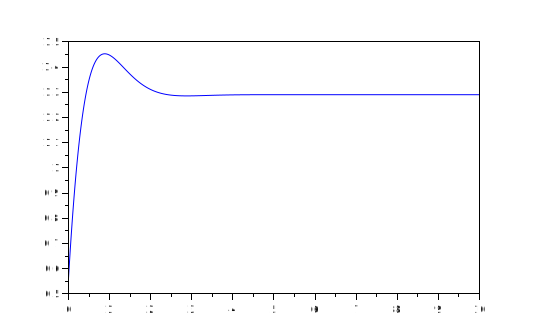

In [63]:
%plot inline
t=0:0.01:10;
y=csim('step',t,gitxia);

plot(t,y)

Zeharo aldatu da dinamika. 

- Konpentsatu behar da irabazia ($H(0)$)

- Konpentsatu behar da zeroaren eragina, adibidez espezifikazioan bidez:  $\delta = 0.75$, $T_1 = 2$.

Errepikatzen da prozesua

  d  = 
   0.75
  T1  = 
   2.
      db  = 
  -8.8879586
 phi  = 
   161.49291
     Td  = 
   0.1544687
    db  = 
  -11.221488
 phi  = 
  -180.
       Kp  = 
   3.6397739
     H0  = 
   0.5
  gitxia  = 
   3.6397739 +2.3821182s +0.2811156s^2  
   -----------------------------------  
       5.6397739 +3.5622312s +s^2       
  
  "Polo desiratua"

  -1.7811156 + 1.5707963i
 
  "Begizta itxiko poloak"

  -1.7811156 + 1.5707963i
  -1.7811156 - 1.5707963i


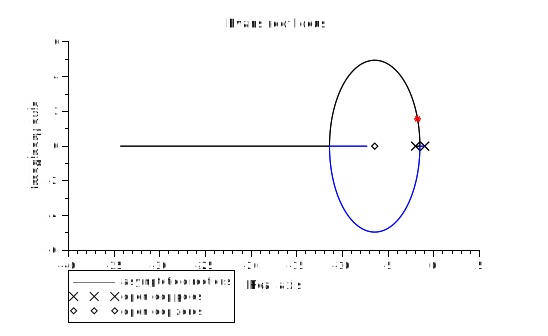

In [65]:
%plot inline
d=0.75
T1=2
wd=%pi/T1;
wn=wd/sqrt(1-d^2);
s0=-d*wn+wn*sqrt(d^2-1);

[db,phi]=dbphi(horner(g*h1,s0))

// Behar den fasea, fase baldintza lortzeko
pha=(180-phi)*%pi/180;
Td=1/(imag(s0)/tan(pha)-real(s0))

// Konprobazioa
[db,phi]=dbphi(horner((1+Td*s)*g*h1,s0))

evans((1+Td*s)*g*h1,250)
plot(real(s0),imag(s0),'*r')

// Moldulu baldintza lortzeko
Kp=1/abs(horner((1+Td*s)*g*h1,s0))

pd=(1+Td*s);

H0=1/2
gitxia=H0*((Kp*pd*g)/.(h1))

disp('Polo desiratua',s0)
disp('Begizta itxiko poloak',roots(gitxia.den))

 WARNING: csim: Input argument #1 is assumed continuous time.
  

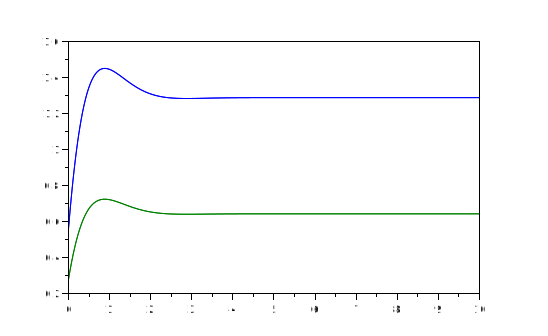

In [67]:
%plot inline
y1=csim('step',t,gitxia);

plot(t,y,t,y1)



Hobetzeko egonkorreko errorea, hau da, prezisioa PI kontrolagailu bat ipintzeko.

Horretarako, zero ez da hurrun ipintzen jatorritik, ez aldatzeko fase baldintza.

$\frac1{T_i} = -real(s_0)/10$

  Ti  = 
   5.6144587
     Kp  = 
   3.8513970
    
  "Begizta itxiko poloak"
  ans  =
  -1.7353981 + 1.5858572i
  -1.7353981 - 1.5858572i
  -0.1241242 + 0.i       
  WARNING: csim: Input argument #1 is assumed continuous time.
  

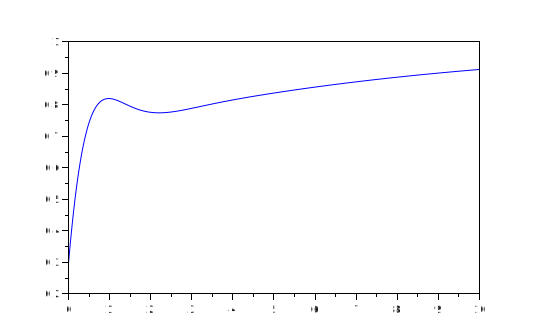

In [77]:
Ti=1/(-real(s0)/10)
pi=(1+1/Ti/s);

// Berriro modulu baldintza kalkulatzen da
Kp=1/abs(horner(pi*pd*g*h1,s0))

// Poloen kalkuluaDenbora eremuko simulazioa
gitxia1=H0*((Kp*pi*pd*g)/.(h1));
disp('Begizta itxiko poloak')
roots(gitxia1.den)
//Denbora eremuko simulazioa
y2=csim('step',t,gitxia1);

plot(t,y2)


Margina dago azkartzeko $T_i$ 

  Ti  = 
   2.8072293
     Kp  = 
   4.0757643
    
  "Begizta itxiko poloak"
  ans  =
  -1.680251 + 1.6039204i
  -1.680251 - 1.6039204i
  -0.269076 + 0.i       
  WARNING: csim: Input argument #1 is assumed continuous time.
  

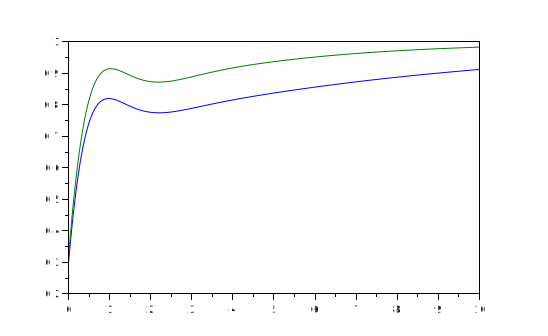

In [78]:
Ti=1/(-real(s0)/10)*0.5
pi=(1+1/Ti/s);

// Berriro modulu baldintza kalkulatzen da
Kp=1/abs(horner(pi*pd*g*h1,s0))

// Poloen kalkuluaDenbora eremuko simulazioa
gitxia1=H0*((Kp*pi*pd*g)/.(h1));
disp('Begizta itxiko poloak')
roots(gitxia1.den)
//Denbora eremuko simulazioa
y3=csim('step',t,gitxia1);

plot(t,y2,t,y3)
